### Инициализация

In [ ]:
# импорт библиотек

import numpy as np
import pandas as pd
import random
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import binom
import math
from google.colab import files
import datetime
from collections import Counter
import copy
from itertools import product

In [ ]:
# функция округления по кратности

def round_mult(x, n):
  return n * round(x / n)

In [ ]:
# функция округления по знакам после запятой

def round_div(x, n):
  return round(x * n) / n

### Задание гиперпараметров для генератора исходных данных

In [ ]:
# количество типов изделий
type_num = 3
print('Количество типов изделий: ', type_num)

# количество изделий
i_num = 5
print('Количество изделий: ', i_num)

# объём партии (от и до)
p_num0 = 3
p_num1 = 10
print('Объём партии: от ', p_num0, ' до ', p_num1)

# количество уровней иерархии
levels = 3
print('Количество уровней иерархии: ', levels)

# количество деталей на уровне (от и до)
d_num0 = 20
d_num1 = 30
print('Количество деталей на уровне: от ', d_num0, ' до ', d_num1)

# количество узлов на уровне (от и до)
u_num0 = 0
u_num1 = 6
print('Количество узлов на уровне: от ', u_num0, ' до ', u_num1)

# количество операций над одной деталью (от и до)
o_num0 = 5
o_num1 = 10
print('Количество операций над одной деталью: от ', o_num0, ' до ', o_num1)

# количество цехов
shop_num = 4
print('Количество цехов: ', shop_num)

# количество станков в цеху (от и до)
s_num0 = 15
s_num1 = 20
print('Количество станков в цеху: от ', s_num0, ' до ', s_num1)

# основное время обработки детали (от и до)
t_main0 = 10
t_main1 = 30
print('Основное время обработки детали: от ', t_main0, ' до ', t_main1)

# дополнительное время обработки детали (от и до)
t_dop0 = 4
t_dop1 = 20
print('Дополнительное время обработки детали: от ', t_dop0, ' до ', t_dop1)

# вероятность брака при мехаонообработке (от и до)
reject0 = 0.03
reject1 = 0.07
print('Вероятность брака при механообработке: от ', reject0, ' до ', reject1)

# время переналадки конвейера (от и до)
t_conv_ch0 = 4000
t_conv_ch1 = 5500
print('Время переналадки конвейера: от ', t_conv_ch0, ' до ', t_conv_ch1)

# время транспортировки деталей (от и до)
t_transp0 = 900
t_transp1 = 1800
print('Время транспортировки деталей: от ', t_transp0, ' до ', t_transp1)

# шаг времени (кратность)
time_step = 5
print('Шаг времени (кратность): ', time_step)

Количество типов изделий:  3
Количество изделий:  5
Объём партии: от  3  до  10
Количество уровней иерархии:  3
Количество деталей на уровне: от  20  до  30
Количество узлов на уровне: от  0  до  6
Количество операций над одной деталью: от  5  до  10
Количество цехов:  4
Количество станков в цеху: от  15  до  20
Основное время обработки детали: от  10  до  30
Дополнительное время обработки детали: от  4  до  20
Вероятность брака при механообработке: от  0.03  до  0.07
Время переналадки конвейера: от  4000  до  5500
Время транспортировки деталей: от  900  до  1800
Шаг времени (кратность):  5


In [ ]:
# пересчёт времён обработки и переналадки (округление до кратности шагу времени)

t_main0 = round_mult(t_main0, time_step)
t_main1 = round_mult(t_main1, time_step)
t_dop0 = round_mult(t_dop0, time_step)
t_dop1 = round_mult(t_dop1, time_step)
t_conv_ch0 = round_mult(t_conv_ch0, time_step)
t_conv_ch1 = round_mult(t_conv_ch1, time_step)
t_transp0 = round_mult(t_transp0, time_step)
t_transp1 = round_mult(t_transp1, time_step)

print('Был произведён пересчёт:\n')
print('Основное время обработки детали: от ', t_main0, ' до ', t_main1)
print('Дополнительное время обработки детали: от ', t_dop0, ' до ', t_dop1)
print('Время переналадки конвейера: от ', t_conv_ch0, ' до ', t_conv_ch1)
print('Время транспортировки деталей: от ', t_transp0, ' до ', t_transp1)

Был произведён пересчёт:

Основное время обработки детали: от  10  до  30
Дополнительное время обработки детали: от  5  до  20
Время переналадки конвейера: от  4000  до  5500
Время транспортировки деталей: от  900  до  1800


### Генератор исходных данных

In [ ]:
# генерация таблицы заказа

order = pd.DataFrame(index=range(i_num), columns=['ID изделия', 'Объём партии', 'Тип изделия', 'Время переналадки', 'Шаг времени'])

types = {}

for i in range(i_num):
  order['ID изделия'][i] = 'I' + str(i+1)
  order['Объём партии'][i] = random.randint(p_num0, p_num1)
  curr_type = random.randint(1, type_num)
  order['Тип изделия'][i] = curr_type
  if curr_type not in types.keys():
    order['Время переналадки'][i] = random.randrange(t_conv_ch0, t_conv_ch1, time_step)
    types[curr_type] = order['Время переналадки'][i]
  else:
    order['Время переналадки'][i] = types[curr_type]
  order['Шаг времени'][i] = time_step

order

,ID изделия,Объём партии,Тип изделия,Время переналадки,Шаг времени
0,I1,5,3,4025,5
1,I2,7,1,5200,5
2,I3,6,2,4695,5
3,I4,5,1,5200,5
4,I5,7,3,4025,5


In [ ]:
# генерация таблицы оборудования

machines = pd.DataFrame(index=range(shop_num*s_num1), columns=['Номер цеха', 'ID станка'])

k = 0 #счётчик присваивания ID

for i in range(shop_num):
  curr_shop_num = random.randint(s_num0, s_num1) #для каждого цеха генерируем своё количество станков
  for j in range(curr_shop_num):
    machines['Номер цеха'][k] = i + 1
    machines['ID станка'][k] = 'S' + str(k+1)
    k += 1

machines.dropna(inplace=True)

machines

,Номер цеха,ID станка
0,1,S1
1,1,S2
2,1,S3
3,1,S4
4,1,S5
...,...,...
56,4,S57
57,4,S58
58,4,S59
59,4,S60


In [ ]:
# генерация таблицы сборки

def rec_size(u, n): #рекурсивная функция, рассчитывающая сумму степенного ряда
  if n == 1:
    return 1
  else:
    return u ** (n - 1) + rec_size(u, n-1)

def max_size(u_num, d_num, i_num, levels): #функция, рассчитывающая максимальный возможный размер таблицы сборки
  return i_num * (u_num + d_num) * rec_size(u_num, levels)

def table_gen(df, i_id, id, current_level, levels, u_k, d_k, s): #рекурсивная функция, генерирующая таблицу сборки
  for i in range(random.randint(d_num0, d_num1)): #генерируем детали
    df['ID изделия'][s] = i_id
    df['ID СЕ'][s] = id
    df['ID ДСЕ-потомка'][s] = 'D' + str(d_k)
    s += 1
    d_k += 1
  if current_level != levels: #если текущий уровень не последний
    for i in range(random.randint(u_num0, u_num1)): #генерируем узлы
      df['ID изделия'][s] = i_id
      df['ID СЕ'][s] = id
      id_u = 'U' + str(u_k)
      df['ID ДСЕ-потомка'][s] = id_u
      s += 1
      u_k += 1
      [u_k, d_k, s] = table_gen(df, i_id, id_u, current_level + 1, levels, u_k, d_k, s) #генерируем детали и узлы для этого узла
  return [u_k, d_k, s]

details = pd.DataFrame(index=range(max_size(u_num1, d_num1, i_num, levels)), columns=['ID изделия', 'ID СЕ', 'ID ДСЕ-потомка'])

u_k = 1 #переменная, запоминающая текущий номер ID узла
d_k = 1 #переменная, запоминающая текущий номер ID детали
s = 0 #переменная, запоминающая текущую строку таблицы сборки

for i in range(i_num): #для каждого изделия генерируем детали и узлы
  [u_k, d_k, s] = table_gen(details, 'I' + str(i + 1), 'I' + str(i + 1), 1, levels, u_k, d_k, s)

d_k -= 1 #запоминаем количество деталей, дальше оно понадобится

details.dropna(inplace=True)

details

,ID изделия,ID СЕ,ID ДСЕ-потомка
0,I1,I1,D1
1,I1,I1,D2
2,I1,I1,D3
3,I1,I1,D4
4,I1,I1,D5
...,...,...,...
1291,I5,U45,D1247
1292,I5,U45,D1248
1293,I5,U45,D1249
1294,I5,U45,D1250


In [ ]:
# генерация таблицы маршрутов по цехам

def route_gen(n_min, n_max, list_from):
  b = []
  for i in range(random.randint(n_min, n_max)):
    temp = random.choice(list_from)
    b.append(temp)
    list_from.remove(temp)
  return b

route_shops = pd.DataFrame(index=range(d_k), columns=['ID детали', 'Маршрут по цехам'])

for i in range(d_k):
  route_shops['ID детали'][i] = 'D' + str(i+1)
  a = [j for j in range(1, shop_num+1)]
  route_shops['Маршрут по цехам'][i] = route_gen(1, shop_num, a)

route_shops

,ID детали,Маршрут по цехам
0,D1,"[2, 1, 3]"
1,D2,"[2, 4, 3]"
2,D3,"[3, 4]"
3,D4,[1]
4,D5,"[2, 3, 4]"
...,...,...
1246,D1247,"[4, 3, 1, 2]"
1247,D1248,"[2, 1]"
1248,D1249,"[1, 3, 2]"
1249,D1250,[2]


In [ ]:
# разбиение деталей по группам

encoder = LabelEncoder()
route_groups = encoder.fit_transform(route_shops['Маршрут по цехам'].transform(lambda x: '_'.join(str(i) for i in x)).values)
route_shops['Номер группы'] = route_groups
route_shops['Номер группы'] = route_shops['Номер группы'].transform(lambda x: x+1)

route_shops

,ID детали,Маршрут по цехам,Номер группы
0,D1,"[2, 1, 3]",19
1,D2,"[2, 4, 3]",31
2,D3,"[3, 4]",44
3,D4,[1],1
4,D5,"[2, 3, 4]",26
...,...,...,...
1246,D1247,"[4, 3, 1, 2]",62
1247,D1248,"[2, 1]",18
1248,D1249,"[1, 3, 2]",8
1249,D1250,[2],17


In [ ]:
# генерация таблицы процента брака по деталям и цехам

reject = pd.DataFrame(index=range(route_shops.shape[0] * shop_num), columns=['ID детали', 'Номер цеха', 'Вероятность брака'])

s = 0  #переменная, запоминающая текущую строку таблицы

for i in range(route_shops.shape[0]): #для каждой детали
  for j in route_shops.iloc[i]['Маршрут по цехам']: #для каждого цеха из маршрута этой детали
    reject['ID детали'][s] = 'D' + str(i+1)
    reject['Номер цеха'][s] = j
    reject['Вероятность брака'][s] = random.randint(reject0*1000, reject1*1000) / 1000
    s += 1

reject.dropna(inplace=True)

reject

,ID детали,Номер цеха,Вероятность брака
0,D1,2,0.049
1,D1,1,0.049
2,D1,3,0.061
3,D2,2,0.044
4,D2,4,0.042
...,...,...,...
3147,D1249,2,0.061
3148,D1250,2,0.033
3149,D1251,1,0.06
3150,D1251,4,0.053


In [ ]:
# генерация таблицы маршрутов по станкам

route_machines = pd.DataFrame(index=range(route_shops.shape[0] * shop_num * o_num1), columns=['ID детали', 'Номер цеха', 'ID станка', 'Основное время', 'Вспомогательное время'])

s = 0  #переменная, запоминающая текущую строку таблицы

for i in tqdm_notebook(range(route_shops.shape[0])): #для каждой детали
  for j in route_shops.iloc[i]['Маршрут по цехам']: #для каждого цеха из маршрута этой детали
    a = route_gen(o_num0, o_num1, machines[machines['Номер цеха'] == j]['ID станка'].to_list()) #генерируем последовательность станков этого цеха
    for k in a: #для каждого станка генерируем время
      route_machines['ID детали'][s] = 'D' + str(i+1)
      route_machines['Номер цеха'][s] = j
      route_machines['ID станка'][s] = k
      route_machines['Основное время'][s] = random.randrange(t_main0, t_main1+1, time_step)
      route_machines['Вспомогательное время'][s] = random.randrange(t_dop0, t_dop1+1, time_step)
      s += 1
    a.clear()

route_machines.dropna(inplace=True)

route_machines

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


,ID детали,Номер цеха,ID станка,Основное время,Вспомогательное время
0,D1,2,S20,10,10
1,D1,2,S26,30,10
2,D1,2,S19,20,20
3,D1,2,S16,10,10
4,D1,2,S17,20,15
...,...,...,...,...,...
23666,D1251,3,S35,10,5
23667,D1251,3,S32,25,10
23668,D1251,3,S31,20,15
23669,D1251,3,S41,10,10


In [ ]:
# генерация таблицы транспортировки

column_names = [a for a in range(1, shop_num + 1)]
column_names.append('Сборка')

transportation_time = pd.DataFrame(index=range(1, shop_num + 1), columns=column_names)

for i in range(1, shop_num + 1):
  for j in range(i, shop_num + 1):
    if i != j:
       curr_time = random.randrange(t_transp0, t_transp1, time_step)
       transportation_time[i][j] = curr_time
       transportation_time[j][i] = curr_time
    else:
      transportation_time[i][j] = 0

for j in range(1, shop_num + 1):
  transportation_time['Сборка'][j] = random.randrange(t_transp0, t_transp1, time_step)

transportation_time

,1,2,3,4,Сборка
1,0,1220,1400,1630,1110
2,1220,0,1200,925,1480
3,1400,1200,0,1025,1735
4,1630,925,1025,0,1395


In [ ]:
# вывод таблиц исходных данных

order.to_csv('order.csv', index=False)

machines.to_csv('machines.csv', index=False)

details.to_csv('details.csv', index=False)

route_shops.to_csv('route_shops.csv', index=False)

reject.to_csv('reject.csv', index=False)

route_machines.to_csv('route_machines.csv', index=False)

transportation_time.to_csv('transportation_time.csv', index=False)

### Восстановление гиперпараметров по существующим таблицам

In [ ]:
# загрузка таблиц исходных данных в скрипт

order = pd.read_csv('order.csv')

machines = pd.read_csv('machines.csv')

details = pd.read_csv('details.csv')

route_shops = pd.read_csv('route_shops.csv')

reject = pd.read_csv('reject.csv')

route_machines = pd.read_csv('route_machines.csv')

transportation_time = pd.read_csv('transportation_time.csv')

In [ ]:
# количество типов изделий
type_num = len(order['Тип изделия'].unique())
print('Количество типов изделий: ', type_num)

# количество изделий
i_num = order.shape[0]
print('Количество изделий: ', i_num)

# количество цехов
shop_num = len(machines['Номер цеха'].unique())
print('Количество цехов: ', shop_num)

# шаг времени (кратность)
time_step = order['Шаг времени'][0]
print('Шаг времени (кратность): ', time_step)

Количество типов изделий:  5
Количество изделий:  10
Количество цехов:  6
Шаг времени (кратность):  5


In [ ]:
# восстановление энкодера для составления в дальнейшем списка маршрутов

encoder = LabelEncoder()
encoder.fit_transform(route_shops['Маршрут по цехам'].transform(lambda x: x[1:-1].replace(', ', '_')).values)

array([1230,  724,  215, ...,    0,  880,  463])

### Задание гиперпараметров для построения расписаний

In [ ]:
# время контроля детали
t_control = 25
print('Время контроля детали: ', t_control)

# время контроля изделия
t_conv_cont = 3000
print('Время контроля изделия: ', t_conv_cont)

# вероятность брака при контроле изделия на сборку
reject_conv = 0.3
print('Вероятность брака при контроле изделия на сборку: ', reject_conv)

# производительность конвейера (изд/день)
conv = 20
print('Производительность конвейера (изд/день): ', conv)

Время контроля детали:  25
Время контроля изделия:  3000
Вероятность брака при контроле изделия на сборку:  0.3
Производительность конвейера (изд/день):  20


In [ ]:
# пересчёт времён контроля и переналадки (округление до кратности шагу времени)

t_control = round_mult(t_control, time_step)
t_conv_cont = round_mult(t_conv_cont, time_step)

print('Был произведён пересчёт:\n')
print('Время контроля детали: ', t_control)
print('Время контроля изделия: ', t_conv_cont)

Был произведён пересчёт:

Время контроля детали:  25
Время контроля изделия:  3000


In [ ]:
# пересчёт производительности конвейера из изд/день в сек/изд

t_conv = 24*3600 / conv
t_conv = round_mult(t_conv, time_step)

print('Был произведён пересчёт:\n')
print('Производительность конвейера (сек/изд): ', t_conv)

Был произведён пересчёт:

Производительность конвейера (сек/изд):  4320


### Генератор локальных расписаний

In [ ]:
class Machine:

  def __init__(self, id):
    self.id = id
    self.just_come = 1 #флаг ожидания: 1 если только что началось ожидание, 0 если ждёт больше одной итерации
    self.wait = 0
  
  def is_free(self):
    if self.wait == 0:
      return True
    else:
      return False

  def passing_time(self, time_step):
    if self.wait != 0:
      self.wait -= time_step
    return

In [ ]:
class Agent:

  def __init__(self, id, route, time, num, control_time):
    self.id = id
    self.route = route #список станков (без контроля / сборки)
    self.time = time #список времён обработки
    self.num = num #объём партии изделия, в состав которого входит деталь / группа
    self.control_time = control_time #время контроля
    self.num_steps = len(route) - 1 #общее число станков (без контроля / сборки) минус 1
    self.step = -1 #шаг: -1 в начале, 0-n на станках, n+1 на контроле / сборке
    self.just_come = 1 #флаг ожидания: 1 если только что началось ожидание, 0 если ждёт больше одной итерации
    self.wait = 0
  
  def time_left(self):
    return sum(self.time[(self.step + 1):])
  
  def operations_left(self):
    return len(self.route[(self.step + 1):])

  def is_free(self):
    if self.wait == 0:
      return True
    else:
      return False
  
  def passing_time(self, time_step):
    if self.wait != 0:
      self.wait -= time_step
    return

In [ ]:
class Fabrik:
  
  def __init__(self, machines, agents, time_step):
    self.machines = machines #список всех станков / цехов
    self.agents = agents #список всех деталей / групп
    self.time_step = time_step # шаг времени
    self.machines.append(Machine('Контроль'))
    self.free_machines = [] #список свободных станков / цехов
    self.match_list = dict((k.id, []) for k in machines) #словарь соответствия станок / цех - свободные детали / группы
    self.match_list['Контроль'] = [] #добавляем в словарь станок контроля
    self.time = 0 #счётчик времени
    self.record_num = 0 #счётчик записей в таблицу расписаний
  
  def is_in_work(self):
    if self.agents: #если ещё есть не окончившие обработку детали
      return True
    else:
      return False
  
  def passing_time(self):
    self.time += self.time_step
    return

In [ ]:
class Detail(Agent):

  def __init__(self, id, route, time, num, control_time, reject):
    Agent.__init__(self, id, route, time, num, control_time)
    self.reject = reject #вероятность брака детали

  def next_machine(self):
    if self.step < self.num_steps:
      return self.route[self.step + 1]
    elif self.step == self.num_steps:
      return 'Контроль'
  
  def next_time(self):
    if self.step < self.num_steps:
      return self.time[self.step + 1]
    elif self.step == self.num_steps:
      return self.control_time

In [ ]:
class Shop(Fabrik):
  
  def __init__(self, machines, agents, time_step):
    Fabrik.__init__(self, machines, agents, time_step)
    self.schedule_df = pd.DataFrame(index=range((len(machines)+1)*len(agents)*5), columns=['Станок', 'Старт', 'Финиш', 'Деталь'])
  
  def assignment(self, machine, detail): #назначение детали на станок
    waiting_time = detail.next_time() * detail.num
    detail.just_come = 1 #возвращаем метку ожидания детали
    machine.just_come = 1 #возвращаем метку ожидания станку
    self.schedule_df['Станок'][self.record_num] = machine.id
    self.schedule_df['Старт'][self.record_num] = self.time
    self.schedule_df['Финиш'][self.record_num] = self.time + waiting_time
    self.schedule_df['Деталь'][self.record_num] = detail.id
    self.record_num += 1
    machine.wait = waiting_time #добавляем временную задержку на станок
    detail.wait = waiting_time #добавляем временную задержку на деталь
    self.free_machines.remove(machine) #удаляем станок из списка свободных
    self.match_list[machine.id].remove(detail) #удаляем деталь из списка свободных
    detail.step += 1
    return
  
  def control(self, detail):
    x = np.random.choice([x for x in range(0,detail.num+1)], p=[binom.pmf(x, detail.num, detail.reject) for x in range(0,detail.num+1)]) #выбираем число бракованных
    if x == 0:
      self.agents.remove(detail) #удаляем деталь из цеха
    else:
      detail.num = 1 #одну деталь оставляем "в собственном теле"
      detail.step = random.randint(-1, detail.num_steps - 1) #случайным образом отправляем эту деталь на доработку
      if x > 1:
        detail_steps = []
        for _ in range(x - 1): #генерируем для оставшихся забракованных деталей новые места маршрута
          detail_steps.append(random.randint(-1, detail.num_steps - 1))
        steps_number = Counter(detail_steps) #подсчитываем количество экземпляров детали на каждому сгенерированном месте маршрута
        for new_step in steps_number.keys():
          new_detail = copy.copy(detail) #создаём новую деталь на основе старой (с нужным количеством экземпляров)
          new_detail.step = new_step
          new_detail.num = steps_number[new_step]
          self.agents.append(new_detail) #добавляем новые детали в список деталей цеха
    return

In [ ]:
# функция выбора на основе решающего правила SPT

def SPT(match_list, min_time):
  for detail in match_list: #для всех свободных деталей, претендующих на этот свободный станок
    detail_time = detail.next_time()
    if detail_time < min_time: #если деталь имеет больший приоритет по правилу SPT
      chosen_detail = detail
      min_time = detail_time
  return chosen_detail

In [ ]:
# функция выбора на основе решающего правила LPT

def LPT(match_list):
  max_time = 0
  for detail in match_list: #для всех свободных деталей, претендующих на этот свободный станок
    detail_time = detail.next_time()
    if detail_time > max_time: #если деталь имеет больший приоритет по правилу LPT
      chosen_detail = detail
      max_time = detail_time
  return chosen_detail

In [ ]:
# функция выбора на основе решающего правила LUKR

def LUKR(match_list, min_time):
  for detail in match_list: #для всех свободных деталей, претендующих на этот свободный станок
    detail_time = detail.time_left()
    if detail_time < min_time: #если деталь имеет больший приоритет по правилу LUKR
      chosen_detail = detail
      min_time = detail_time
  return chosen_detail

In [ ]:
# функция выбора на основе решающего правила MWKR

def MWKR(match_list):
  max_time = 0
  for detail in match_list: #для всех свободных деталей, претендующих на этот свободный станок
    detail_time = detail.time_left()
    if detail_time > max_time: #если деталь имеет больший приоритет по правилу MWKR
      chosen_detail = detail
      max_time = detail_time
  return chosen_detail

In [ ]:
# функция выбора на основе решающего правила FOPNR

def FOPNR(match_list, min_num_operations):
  for detail in match_list: #для всех свободных деталей, претендующих на этот свободный станок
    detail_num_operations = detail.operations_left()
    if detail_num_operations < min_num_operations: #если деталь имеет больший приоритет по правилу FOPNR
      chosen_detail = detail
      min_num_operations = detail_num_operations
  return chosen_detail

In [ ]:
# генератор локальных расписаний

def local_gen(df, reject_df, full_num, t_control, time_step, rule):

  max_num_operations = df.shape[0] + 1 #вычисляем максимальное число оставшихся операций
  max_time_const = df['Время'].sum() * full_num #вычисляем максимальное время

  list_mac = pd.unique(df['ID станка']) #список всех станков
  mac = []
  for i in list_mac: #инициализируем станки как объекты
    mac.append(Machine(i))

  list_det = pd.unique(df['ID детали']) #список всех деталей
  det = []
  for i in list_det: #инициализируем детали как объекты
    curr_route = df[df['ID детали'] == i]['ID станка'].to_list()
    curr_time = df[df['ID детали'] == i]['Время'].to_list()
    curr_reject = reject_df[reject_df['ID детали'] == i]['Вероятность брака'].to_list()[0]
    det.append(Detail(i, curr_route, curr_time, full_num, t_control, curr_reject))

  shop = Shop(mac, det, time_step) #создаём объект класса цех


  while shop.is_in_work(): #основной цикл работы цеха

    for machine in shop.machines: #для всех объектов класса станок
      machine.passing_time(shop.time_step) #уменьшаем счётчик времени
      if machine.is_free() and machine.just_come:
        shop.free_machines.append(machine) #добавляем станок в список свободных
        machine.just_come = 0 #снимаем метку ожидания
    
    for detail in shop.agents: #для всех объектов класса деталь
      detail.passing_time(shop.time_step) #уменьшаем счётчик времени
      if detail.is_free() and detail.just_come:
        shop.match_list[detail.next_machine()].append(detail) #добавляем деталь в список свободных деталей для требуемого станка
        detail.just_come = 0 #снимаем метку ожидания
    
    for machine in shop.free_machines:
      if shop.match_list[machine.id]: #если на станок есть претенденты
        if machine.id != 'Контроль':
          if rule == 'SPT':
            chosen_detail = SPT(shop.match_list[machine.id], max_time_const)
          elif rule == 'LPT':
            chosen_detail = LPT(shop.match_list[machine.id])
          elif rule == 'LUKR':
            chosen_detail = LUKR(shop.match_list[machine.id], max_time_const)
          elif rule == 'MWKR':
            chosen_detail = MWKR(shop.match_list[machine.id])
          elif rule == 'FOPNR':
            chosen_detail = FOPNR(shop.match_list[machine.id], max_num_operations)
          shop.assignment(machine, chosen_detail) #назначаем деталь на станок
        else:
          chosen_detail = shop.match_list[machine.id][0]
          shop.assignment(machine, chosen_detail) #назначаем первую претендующую деталь на контроль
          shop.control(chosen_detail) #проводим операцию контроля
    
    shop.passing_time() #переходим к следующему шагу модельного времени

  shop.schedule_df.dropna(inplace=True)

  return shop.schedule_df

In [ ]:
# агрегатор локальных расписаний

def schedule_gen(route_df, reject_df, full_num, t_control, time_step):

  record_schedule = local_gen(route_df, reject_df, full_num, t_control, time_step, 'SPT')
  record = record_schedule['Финиш'].max()
  record_rule = 'SPT'

  df_LPT = local_gen(route_df, reject_df, full_num, t_control, time_step, 'LPT')
  if df_LPT['Финиш'].max() < record:
    record_schedule = df_LPT
    record_rule = 'LPT'
    record = record_schedule['Финиш'].max()
  
  df_LUKR = local_gen(route_df, reject_df, full_num, t_control, time_step, 'LUKR')
  if df_LUKR['Финиш'].max() < record:
    record_schedule = df_LUKR
    record_rule = 'LUKR'
    record = record_schedule['Финиш'].max()
  
  df_MWKR = local_gen(route_df, reject_df, full_num, t_control, time_step, 'MWKR')
  if df_MWKR['Финиш'].max() < record:
    record_schedule = df_MWKR
    record_rule = 'MWKR'
    record = record_schedule['Финиш'].max()
  
  df_FOPNR = local_gen(route_df, reject_df, full_num, t_control, time_step, 'FOPNR')
  if df_FOPNR['Финиш'].max() < record:
    record_schedule = df_FOPNR
    record_rule = 'FOPNR'
    
  return [record_schedule, record_rule]

In [ ]:
# функция вычисления коэффициентов загрузки

def load_factor_calc(load_factor, df, id_i, group_num, shop_num, row_num):
  machine_list = df['Станок'].unique() #создаём список всех станков этого цеха
  for machine in machine_list: #для каждого станка
    curr_df = df[df['Станок'] == machine]
    work_time = curr_df['Финиш'].sum() - curr_df['Старт'].sum() #общее время работы станка
    factor = round_div(work_time / curr_df['Финиш'].max(), 1000) #коэффициент загрузки станка
    if machine != 'Контроль':
      load_factor.loc[row_num] = [id_i, group_num, shop_num, machine, factor]
    else:
      load_factor.loc[row_num] = [id_i, group_num, shop_num, machine + ' ' + str(shop_num), factor]
    row_num += 1
  return row_num

### Построение локальных расписаний



In [ ]:
# построение и запись локальных расписаний + создание таблицы для построения каркасного расписания
%%time

!mkdir local_schedules #создаём папку для хранения наших расписаний

sum_routes = len(route_shops['Номер группы'].unique()) #считаем общее количество групп
group_list = encoder.inverse_transform([i for i in range(sum_routes)]) #возвращаемся от номера группы деталей к цеховому маршруту группы
group_list = [i.split('_') for i in group_list] #создаём список маршрутов (список списков)

all_schedules = pd.DataFrame(index=range(i_num*sum_routes*shop_num*2), columns=['ID изделия', 'Номер группы', 'Номер цеха', 'Время', 'Правило'])
load_factor = pd.DataFrame(columns=['ID изделия', 'Номер группы', 'Номер цеха', 'ID станка', 'Коэффициент загрузки'])

s = 0  #переменная, запоминающая текущую строку таблицы для каркасного расписания
row_num = 0  #переменная, запоминающая текущую строку таблицы коэффициентов загрузки
loc_schedule_files = [] #список всех имён файлов с локальными расписаниями

for j in order['ID изделия'].values: #для конкретного изделия
  full_num = order[order['ID изделия'] == j].iloc[:, 1].to_list()[0] #определяем размер партии изделия (затем передадим его в генератор)
  d_i_list = details[(details['ID изделия'] == j) \
                     & (details['ID ДСЕ-потомка'].str.contains('D'))].iloc[:, 2].tolist() #список всех деталей этого изделия
  groups = sorted(route_shops[route_shops['ID детали'].isin(d_i_list)]['Номер группы'].unique()) #список всех групп этого изделия
  for k in tqdm_notebook(groups): #для конкретной группы
    d_group_list = route_shops[route_shops['Номер группы'] == k].iloc[:, 0].tolist() #список всех деталей этой группы
    curr_shop = 0
    for p in group_list[k-1]: #для конкретного цеха
      temp_route_df = route_machines[(route_machines['ID детали'].isin(d_i_list)) \
                               & (route_machines['ID детали'].isin(d_group_list)) \
                               & (route_machines['Номер цеха'] == int(p))].reset_index(drop=True) #создаём маршрутный датафрейм для генератора
      temp_route_df['Время'] = temp_route_df['Основное время'] + temp_route_df['Вспомогательное время']
      temp_route_df = temp_route_df.drop(['Номер цеха', 'Основное время', 'Вспомогательное время'], axis=1)
      temp_reject_df = reject[(reject['ID детали'].isin(d_i_list)) \
                               & (reject['ID детали'].isin(d_group_list)) \
                               & (reject['Номер цеха'] == int(p))].reset_index(drop=True) #создаём датафрейм вероятности брака для генератора
      temp_reject_df = temp_reject_df.drop(['Номер цеха'], axis=1)
      [curr_schedule, curr_rule] = schedule_gen(temp_route_df, temp_reject_df, full_num, t_control, time_step) #создаём локальное расписание
      row_num = load_factor_calc(load_factor, curr_schedule, j, k, int(p), row_num) #добавляем строки в датафрейм коэффициента загрузки
      all_schedules['ID изделия'][s] = j
      all_schedules['Номер группы'][s] = k
      all_schedules['Номер цеха'][s] = int(p)
      all_schedules['Время'][s] = curr_schedule['Финиш'].max()
      all_schedules['Правило'][s] = curr_rule
      all_schedules['ID изделия'][s+1] = j
      all_schedules['Номер группы'][s+1] = k
      all_schedules['Номер цеха'][s+1] = 'Транспорт'
      if curr_shop != (len(group_list[k-1]) - 1): #если этот цех не был последним в маршруте
        all_schedules['Время'][s+1] = transportation_time[int(group_list[k-1][curr_shop+1])][int(p)] #пишем время транспортировки в следующий цех
      else:
        all_schedules['Время'][s+1] = transportation_time['Сборка'][int(p)] #пишем время транспортировки на сборку
      all_schedules['Правило'][s+1] = curr_rule
      curr_shop += 1
      s += 2
      file_name = 'local_schedules/%s_%s_%s.csv' % (j,k,p)
      loc_schedule_files.append(file_name) #добавляем имя файла в список имён
      curr_schedule.to_csv(file_name, index=False)

all_schedules.dropna(inplace=True)

all_schedules.to_csv('all_schedules.csv', index=False) #вывод таблицы для каркасного расписания
load_factor.to_csv('load_factor.csv', index=False) #вывод таблицы коэффициентов загрузки

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



CPU times: user 3min 21s, sys: 2.58 s, total: 3min 23s
Wall time: 3min 22s


### Генератор каркасного расписания

In [ ]:
class Group(Agent):

  def __init__(self, id, i_id, route, time, control_time, assembly_time, changeover_time, processing_priority, assembly_priority, num):
    Agent.__init__(self, id, route, time, num, control_time)
    self.i_id = i_id #id изделия, в состав которого входит группа
    self.assembly_time = assembly_time #время сборки
    self.changeover_time = changeover_time #время переналадки
    self.processing_priority = processing_priority #приоритет обработки изделия, в состав которого входит группа
    self.assembly_priority = assembly_priority #приоритет сборки изделия, в состав которого входит группа

  def prev_machine(self):
    if self.step != -1:
      return self.route[self.step]
    else:
      return self.route[0]
  
  def next_machine(self):
    if self.step < self.num_steps:
      return self.route[self.step + 1]
    elif self.step == self.num_steps: #если сборка
      return 'Сборка'
    elif self.step == (self.num_steps + 1): #если контроль
      return 'Контроль'
  
  def next_time(self):
    if self.step < self.num_steps:
      return self.time[self.step + 1]
    elif self.step == self.num_steps: #если сборка
      return self.changeover_time + (self.assembly_time * self.num)
    elif self.step == (self.num_steps + 1): #если контроль
      return self.control_time * self.num

  def needs_transport(self):
    if self.next_machine() == 'Транспорт':
      return True
    else:
      return False

In [ ]:
class Factory(Fabrik):
  
  def __init__(self, machines, agents, assembly_counter, reject_conv, assembly_priority, time_step):
    Fabrik.__init__(self, machines, agents, time_step)
    self.match_list['Сборка'] = [] #добавляем в словарь станок сборки
    self.schedule_df = pd.DataFrame(index=range((len(machines)+1)*len(agents)*5), columns=['Цех', 'Старт', 'Финиш', 'Группа'])
    self.assembly_counter = assembly_counter #сборочный счётчик в виде словаря с ключами-изделиями
    self.reject = reject_conv #вероятность брака
    self.assembly_priority = assembly_priority #список приоритетов обслуживания на сборке
    self.priority_change = 0 #метка смены приоритета сборки
  
  def assignment(self, shop, group): #назначение группы на цех
    waiting_time = group.next_time()
    group.just_come = 1 #возвращаем метку ожидания группе
    shop.just_come = 1 #возвращаем метку ожидания цеху
    if shop.id == 'Контроль':
      self.schedule_df['Цех'][self.record_num] = 'Контроль'
    else:
      self.schedule_df['Цех'][self.record_num] = 'Цех ' + shop.id
    self.schedule_df['Старт'][self.record_num] = self.time
    self.schedule_df['Финиш'][self.record_num] = self.time + waiting_time
    self.schedule_df['Группа'][self.record_num] = group.id
    self.record_num += 1
    shop.wait = waiting_time #добавляем временную задержку на цех
    group.wait = waiting_time #добавляем временную задержку на группу
    self.free_machines.remove(shop) #удаляем цех из списка свободных
    self.match_list[shop.id].remove(group) #удаляем группу из списка свободных
    group.step += 1
    return
  
  def assembly(self, shop, group):
    waiting_time = group.next_time() + self.priority_change_time()
    group.just_come = 1 #возвращаем метку ожидания группе
    shop.just_come = 1 #возвращаем метку ожидания цеху
    self.schedule_df['Цех'][self.record_num] = 'Сборка'
    self.schedule_df['Старт'][self.record_num] = self.time + group.changeover_time + self.priority_change_time()
    self.priority_change = 0 #снимаем метку смены приоритета сборки
    self.schedule_df['Финиш'][self.record_num] = self.time + waiting_time
    self.schedule_df['Группа'][self.record_num] = group.id
    self.record_num += 1
    shop.wait = waiting_time #добавляем временную задержку на цех
    group.wait = waiting_time #добавляем временную задержку на группу
    self.free_machines.remove(shop) #удаляем цех из списка свободных
    self.match_list[shop.id].remove(group) #удаляем группу из списка свободных
    group.step += 1
    return
  
  def control(self, group):
    x = np.random.choice([x for x in range(0,group.num+1)], p=[binom.pmf(x, group.num, self.reject) for x in range(0,group.num+1)]) #выбираем число бракованных
    if x == 0:
      self.agents.remove(group) #удаляем группу из цеха
      if len(self.assembly_priority) > 1:
        self.assembly_priority = self.assembly_priority[1:] #предоставляем приоритет сборки следующему изделию
        self.priority_change = 1 #ставим метку смены приоритета сборки
    else:
      group.num = x #уменьшаем объём партии этого изделия
      group.step = group.num_steps #отправляем деталь на пересборку
    return
  
  def transportation(self, group):
    waiting_time = group.next_time()
    self.schedule_df['Цех'][self.record_num] = 'Транспорт ' + group.prev_machine()
    self.schedule_df['Старт'][self.record_num] = self.time
    self.schedule_df['Финиш'][self.record_num] = self.time + waiting_time
    self.schedule_df['Группа'][self.record_num] = group.id
    self.record_num += 1
    group.wait = waiting_time #добавляем временную задержку на группу
    group.step += 1
    return
  
  def priority_filtering(self, match_list):
    best_priority = match_list[0].processing_priority
    for group in match_list:
      if group.processing_priority < best_priority: #если приоритет группы выше наивысшего
        best_priority = group.processing_priority
    filtered_list = []
    for group in match_list:
      if group.processing_priority == best_priority: #если приоритет группы наивысший
        filtered_list.append(group)
    return filtered_list
  
  def allocation(self, shop, group): #процедура распределения групп, дошедших до сборки
    if self.assembly_counter[group.i_id] > 1:
      self.assembly_counter[group.i_id] -= 1
      self.match_list['Сборка'].remove(group)
      self.agents.remove(group) #удаляем группу
    elif (group.assembly_priority == self.assembly_priority[0]) and (self.assembly_counter[group.i_id] == 1): #если должно собираться именно это изделие
      self.assembly_counter[group.i_id] -= 1
      group.id = group.i_id #теперь группа становится изделием
      self.assembly(shop, group) #отправляем изделие на сборку
    elif (group.assembly_priority == self.assembly_priority[0]) and (self.assembly_counter[group.i_id] == 0): #если должно собираться именно это изделие
      self.assembly(shop, group) #отправляем изделие на пересборку
    return
  
  def priority_change_time(self):
    if self.priority_change == 0:
      return 0
    elif self.priority_change == 1:
      return self.machines[-1].wait #возвращаем время ожидания на контроле

In [ ]:
# генератор каркасного расписания

def shell_gen(df, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, rule):
  
  max_num_operations = df.shape[0] + 1 #вычисляем максимальное число оставшихся операций
  max_time_const = df['Время'].sum() #вычисляем максимальное время

  shops = []
  for i in range(1, shop_num + 1): #инициализируем цеха как объекты
    shops.append(Machine(str(i)))
  shops.append(Machine('Сборка'))

  t_ch_dict = order['Время переналадки'].to_dict() #словарь времён переналадки
  priority1_dict = order['Приоритет обработки'].to_dict() #словарь обработки групп
  priority2_dict = order['Приоритет сборки'].to_dict() #словарь обработки групп
  num_dict = order['Объём партии'].to_dict() #словарь объёмов партий

  list_group = pd.unique(df['ID группы']) #список всех групп
  groups = []
  for i in list_group: #инициализируем группы как объекты
    curr_i = i.split('_')[0]
    curr_route = df[df['ID группы'] == i]['Номер цеха'].to_list()
    curr_time = df[df['ID группы'] == i]['Время'].to_list()
    groups.append(Group(i, curr_i, curr_route, curr_time, t_conv_cont, t_conv,
                        t_ch_dict[curr_i], priority1_dict[curr_i], priority2_dict[curr_i], num_dict[curr_i]))

  factory = Factory(shops, groups, assembly_counter.copy(), reject_conv, order['Приоритет сборки'].to_list(), time_step) #создаём объект класса фабрика

  while factory.is_in_work(): #основной цикл работы цеха

    for shop in factory.machines: #для всех цехов
      shop.passing_time(factory.time_step) #уменьшаем счётчик времени
      if shop.is_free() and shop.just_come:
        factory.free_machines.append(shop) #добавляем цех в список свободных
        shop.just_come = 0 #снимаем метку ожидания
    
    for group in factory.agents: #для всех объектов класса группа
      group.passing_time(factory.time_step) #уменьшаем счётчик времени
      if group.is_free():
        if group.needs_transport():
          factory.transportation(group)
        elif group.just_come:
          factory.match_list[group.next_machine()].append(group) #добавляем группу в список свободных групп для требуемого цеха
          group.just_come = 0 #снимаем метку ожидания
    
    for shop in factory.free_machines:
      if factory.match_list[shop.id]: #если на цех есть претенденты
        if (shop.id != 'Контроль') and (shop.id != 'Сборка'):
          filtered_groups = factory.priority_filtering(factory.match_list[shop.id])
          if rule == 'SPT':
            chosen_group = SPT(filtered_groups, max_time_const)
          elif rule == 'LPT':
            chosen_group = LPT(filtered_groups)
          elif rule == 'LUKR':
            chosen_group = LUKR(filtered_groups, max_time_const)
          elif rule == 'MWKR':
            chosen_group = MWKR(filtered_groups)
          elif rule == 'FOPNR':
            chosen_group = FOPNR(filtered_groups, max_num_operations)
          factory.assignment(shop, chosen_group) #назначаем группу на цех
        elif (shop.id == 'Сборка'):
          for group in factory.match_list[shop.id]:
            factory.allocation(shop, group) #отправляем группу на распределение
        elif (shop.id == 'Контроль'):
          chosen_group = factory.match_list[shop.id][0] #в этом списке всегда будет только одна группа
          factory.assignment(shop, chosen_group) #назначаем данную группу на контроль
          factory.control(chosen_group) #проводим операцию контроля
    
    factory.passing_time() #переходим к следующему шагу модельного времени

  factory.schedule_df.dropna(inplace=True)

  return factory.schedule_df

In [ ]:
# агрегатор каркасного расписания

def shell_schedule_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step):

  record_schedule = shell_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, 'SPT')
  record = record_schedule['Финиш'].max()

  df_LPT = shell_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, 'LPT')
  if df_LPT['Финиш'].max() < record:
    record_schedule = df_LPT
    record = record_schedule['Финиш'].max()
  
  df_LUKR = shell_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, 'LUKR')
  if df_LUKR['Финиш'].max() < record:
    record_schedule = df_LUKR
    record = record_schedule['Финиш'].max()
  
  df_MWKR = shell_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, 'MWKR')
  if df_MWKR['Финиш'].max() < record:
    record_schedule = df_MWKR
    record = record_schedule['Финиш'].max()
  
  df_FOPNR = shell_gen(all_schedules, order, assembly_counter, shop_num, t_conv_cont, reject_conv, t_conv, time_step, 'FOPNR')
  if df_FOPNR['Финиш'].max() < record:
    record_schedule = df_FOPNR
    
  return record_schedule

### Построение каркасного расписания

In [ ]:
# подготовка таблиц данных

pd.options.mode.chained_assignment = None

all_schedules = pd.read_csv('all_schedules.csv') #считываем таблицу для каркасного расписания
temp_df = all_schedules.groupby(['ID изделия'])
temp_df = temp_df.agg({'Номер группы': 'nunique'})
num_group_dict = temp_df['Номер группы'].to_dict()
all_schedules['Номер группы'] = all_schedules['Номер группы'].transform(lambda x: '_' + str(x))
all_schedules['ID группы'] = all_schedules['ID изделия'] + all_schedules['Номер группы']
all_schedules = all_schedules.drop(['ID изделия', 'Номер группы', 'Правило'], axis=1)
all_schedules = all_schedules[['ID группы', 'Номер цеха', 'Время']]

order = pd.read_csv('order.csv') #считываем таблицу заказа
order = order.drop(['Шаг времени'], axis=1)
order = order.sort_values(by=['Время переналадки', 'Тип изделия'], ascending=False, ignore_index=True)
order = order.sort_values(by=['Время переналадки', 'Тип изделия'], ascending=False, ignore_index=True)
order['Приоритет обработки'] = range(order.shape[0])
order['Приоритет сборки'] = range(order.shape[0])
order['Время переналадки'][0] = 0
for i in range(1, order.shape[0]):
  if order['Тип изделия'][i] == order['Тип изделия'][i-1]:
    order['Время переналадки'][i] = 0
    order['Приоритет сборки'][i] = order['Приоритет сборки'][i-1]
  else:
    order['Приоритет сборки'][i] = order['Приоритет сборки'][i-1] + 1
order = order.drop(['Тип изделия'], axis=1)
order = order.set_index('ID изделия')

pd.options.mode.chained_assignment = 'warn'

In [ ]:
# построение каркасного расписания
%%time

shell_schedule = shell_schedule_gen(all_schedules, order, num_group_dict, shop_num, t_conv_cont, reject_conv, t_conv, time_step)

shell_schedule.to_csv('shell_schedule.csv', index=False) #запись каркасного расписания

CPU times: user 1min 5s, sys: 199 ms, total: 1min 5s
Wall time: 1min 5s


### Функции построения диаграмм Ганта

In [ ]:
# функция построения диаграммы Ганта для локального расписания

def gantt_chart(curr_i, curr_group, shop, machines_list):

  file_name = '%s_%s_%s' % (curr_i,curr_group,shop)
  schedule_df = pd.read_csv('local_schedules/' + file_name + '.csv')

  s_num = len(machines_list) #количество станков в цеху
  m_place = dict(zip(machines_list, range(s_num + 1))) #словарь положений станков на диаграмме

  fig, gnt = plt.subplots()
  gnt.set_ylim(0, s_num*10 + 10) #расчёт размеров диаграммы
  gnt.set_xlim(0, schedule_df['Финиш'].max())

  gnt.set_xlabel('Секунд от начала')
  gnt.set_ylabel('ID станков')

  gnt.set_yticks([i*10+5 for i in range(0,s_num+1)])
  y_labels = machines_list #подписываем станки
  gnt.set_yticklabels(y_labels)

  main_text = 'Изделие ' + str(curr_i) + '\nГруппа деталей ' + str(curr_group) + '\nЦех №' + str(shop)
  gnt.text(gnt.get_xlim()[1] * 1.05, gnt.get_ylim()[1] - 35, main_text, fontsize=12) #добавляем заголовок диаграммы

  gnt.grid(True)

  h = []
  list_det = pd.unique(schedule_df['Деталь'])
  d_color = dict.fromkeys(list_det, 0) #красим детали
  r = lambda: random.randint(0,255)
  for i in list_det:
    d_color[i] = '#%02X%02X%02X' % (r(),r(),r())
    h.append(mpatches.Patch(color=d_color[i], label=i))

  for i in range(schedule_df.shape[0]):
    t0 = schedule_df['Старт'][i]
    t1 = schedule_df['Финиш'][i]
    gnt.broken_barh([(t0, t1 - t0)],
                      (1+10*m_place[schedule_df['Станок'][i]], 8),
                      facecolors = (d_color[schedule_df['Деталь'][i]]))
  
  ncol_legend = math.ceil(len(list_det) / 10) #считаем оптимальное количество столбцов для легенды
  gnt.legend(handles=h, loc=[1.05, 0.05], ncol=ncol_legend)

  return

In [ ]:
# генератор генераторов цвета

def color_gen_generator(num):
  part_num = math.ceil(num ** (1/3)) * 2 - 1 #количество промежутков генерации цвета
  part_size = round(256 / part_num) #размер каждого промежутка
  color_gen = [] #список генераторов 1/3 цветового кода
  if part_num != 1:
    for i in range(0, part_num-1, 2):
      color_gen.append(lambda: random.randint(part_size*i, part_size*(i+1) - 1))
  color_gen.append(lambda: random.randint(part_size*(part_num-1), 255))
  color_gen_combinations = list(product(color_gen, repeat=3)) #список всех комбинаций генераторов цвета
  i_color_gens = random.sample(color_gen_combinations, k=num) #выбираем из списка количество комбинаций, равное числу изделий
  return i_color_gens

In [ ]:
# функция построения диаграммы Ганта для каркасного расписания

def gantt_chart_shell(schedule_df, shop_num, i_num, show_legend):

  shops_list = ['Контроль', 'Сборка'] + ['Транспорт '+str(i) for i in range(shop_num,0,-1)] + ['Цех '+str(i) for i in range(shop_num,0,-1)]
  s_place = dict(zip(shops_list, range(shop_num * 2 + 2))) #словарь положений цехов на диаграмме

  fig, gnt = plt.subplots()
  gnt.set_ylim(0, shop_num*10*2 + 20) #расчёт размеров диаграммы
  gnt.set_xlim(0, schedule_df['Финиш'].max())

  gnt.set_xlabel('Секунд от начала')
  gnt.set_ylabel('Обобщённые станки')

  gnt.set_yticks([i*10+5 for i in range(0,shop_num*2+2)])
  y_labels = shops_list #подписываем цеха
  gnt.set_yticklabels(y_labels)

  gnt.grid(True)

  h = []
  list_groups = pd.unique(schedule_df['Группа'])
  group_color = dict.fromkeys(list_groups, 0)
  color_gens = color_gen_generator(i_num) #генерируем генераторы цвета
  for i in list_groups:
    k = int(i.split('_')[0][1:]) #номер изделия этой группы
    color1 = color_gens[k-1][0]
    color2 = color_gens[k-1][1]
    color3 = color_gens[k-1][2]
    group_color[i] = '#%02X%02X%02X' % (color1(), color2(), color3()) #генерируем цвет группы
    h.append(mpatches.Patch(color=group_color[i], label=i))

  for i in range(schedule_df.shape[0]):
    t0 = schedule_df['Старт'][i]
    t1 = schedule_df['Финиш'][i]
    gnt.broken_barh([(t0, t1 - t0)],
                      (1+10*s_place[schedule_df['Цех'][i]], 8),
                      facecolors = (group_color[schedule_df['Группа'][i]]))

  ncol_legend = math.ceil(len(list_groups) / 10) #считаем оптимальное количество столбцов для легенды
  if show_legend != 0:
    gnt.legend(handles=h, loc=[1.05, 0.05], ncol=ncol_legend)

  return

### Демонстрации работы функций построения диаграмм Ганта

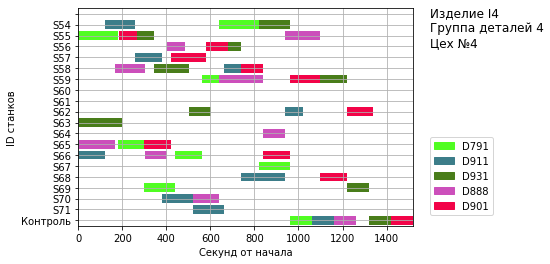

In [ ]:
# демонстрация работы функции построения диаграмм Ганта для локальных расписаний

i_id_gantt = 'I4' #ID изделия
group_num_gantt = 4 #номер группы деталей
shop_num_gantt = 4 #номер цеха

machines_list_gantt = ['Контроль'] + list(reversed(machines[machines['Номер цеха'] == shop_num_gantt]['ID станка'].to_list()))

gantt_chart(i_id_gantt, group_num_gantt, shop_num_gantt, machines_list_gantt)

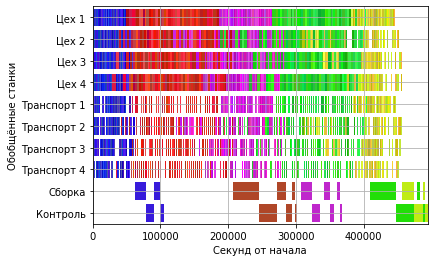

In [ ]:
# демонстрация работы функции построения диаграммы Ганта для каркасного расписания

show = 0 #показывать легенду? (1 - да, 0 - нет)

shell_schedule = pd.read_csv('shell_schedule.csv')
gantt_chart_shell(shell_schedule, shop_num, i_num, show)

### Статистика по заказу

In [ ]:
# вывод всех основных параметров заказа

all_schedules = pd.read_csv('all_schedules.csv')
loc_schedules = all_schedules.copy()
loc_schedules['Номер группы'] = loc_schedules['Номер группы'].transform(lambda x: '_' + str(x))
loc_schedules['ID группы'] = loc_schedules['ID изделия'] + loc_schedules['Номер группы']

print('Число типов изделий: ', type_num)
print('Число изделий: ', i_num)
print('Число цехов: ', shop_num)
print('Число станков: ', machines.shape[0])
print('Число деталей: ', route_shops.shape[0])
print('Число операций: ', route_machines.shape[0])
print('Число групп: ', len(pd.unique(loc_schedules['ID группы'])))
print('Число локальных расписаний: ', int(all_schedules.shape[0] / 2))

print('\nШаг времени (кратность): ', time_step)
print('Время контроля детали: ', t_control)
print('Время контроля изделия: ', t_conv_cont)
print('Вероятность брака при контроле изделия на сборку: ', reject_conv)
print('Производительность конвейера (изд/день): ', conv)
print('Производительность конвейера (сек/изд): ', t_conv)

Число типов изделий:  3
Число изделий:  5
Число цехов:  4
Число станков:  71
Число деталей:  1161
Число операций:  22146
Число групп:  289
Число локальных расписаний:  875

Шаг времени (кратность):  5
Время контроля детали:  25
Время контроля изделия:  3000
Вероятность брака при контроле изделия на сборку:  0.3
Производительность конвейера (изд/день):  20
Производительность конвейера (сек/изд):  4320


In [ ]:
# расчёт общего времени выполнения заказа

shell_schedule = pd.read_csv('shell_schedule.csv')

t_prod = shell_schedule['Финиш'].max()

str(datetime.timedelta(seconds=t_prod))

'5 days, 17:19:00'

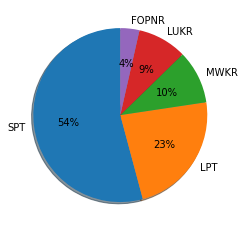

In [ ]:
# построение диаграммы процентного использования решающих правил

all_schedules = pd.read_csv('all_schedules.csv')

rule_count = all_schedules['Правило'].value_counts().to_dict()

labels = []
sizes = []

for x, y in rule_count.items():
  labels.append(x)
  sizes.append(y)

fig, rule = plt.subplots()
rule.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)

plt.show()

### Статистический анализ по коэффициенту загрузки

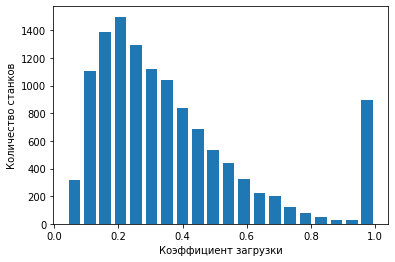

In [ ]:
# столбчатая диаграмма распределения коэффициентов загрузки оборудования

load_factor = pd.read_csv('load_factor.csv')

fig, factor = plt.subplots()
factor.set_xlabel('Коэффициент загрузки')
factor.set_ylabel('Количество станков')
plt.hist(load_factor['Коэффициент загрузки'].values, bins=20, rwidth = 0.75)

plt.show()

In [ ]:
# расчёт максимального, минимального и среднего коэффициента загрузки оборудования для всего предприятия

min_factor = load_factor['Коэффициент загрузки'].min()
max_factor = load_factor['Коэффициент загрузки'].max()
mean_factor = round_div(load_factor['Коэффициент загрузки'].mean(), 1000)

print('Минимальный коэффициент загрузки оборудования: ', round_div(min_factor, 1000))
print('Максимальный коэффициент загрузки оборудования: ', max_factor)
print('Средний коэффициент загрузки оборудования: ', mean_factor)

Минимальный коэффициент загрузки оборудования:  0.039
Максимальный коэффициент загрузки оборудования:  1.0
Средний коэффициент загрузки оборудования:  0.366


In [ ]:
# вывод n% таблицы данных с худшим коэффициентом загрузки

n_percent_worst = 5 #требуемый процент

n_value_worst = round(load_factor.shape[0] * n_percent_worst / 100)

load_factor_sorted = load_factor.sort_values(by=['Коэффициент загрузки'], ignore_index = True)

load_factor_sorted.head(n_value_worst)

,ID изделия,Номер группы,Номер цеха,ID станка,Коэффициент загрузки
0,I5,64,3,S43,0.039
1,I2,22,3,S52,0.039
2,I4,14,3,S53,0.042
3,I5,36,3,S52,0.043
4,I4,43,1,S3,0.044
...,...,...,...,...,...
606,I2,62,3,S48,0.103
607,I2,8,3,S36,0.103
608,I2,27,4,S61,0.103
609,I3,39,3,S36,0.103


In [ ]:
# вывод n% таблицы данных с лучшим коэффициентом загрузки

n_percent_best = 5 #требуемый процент

n_value_best = round(load_factor.shape[0] * n_percent_best / 100)

load_factor_sorted = load_factor.sort_values(by=['Коэффициент загрузки'], ignore_index = True)

load_factor_sorted.tail(n_value_worst)

,ID изделия,Номер группы,Номер цеха,ID станка,Коэффициент загрузки
11609,I3,6,4,S56,1.0
11610,I3,6,2,S23,1.0
11611,I2,50,4,S66,1.0
11612,I4,46,4,S68,1.0
11613,I5,63,4,S57,1.0
...,...,...,...,...,...
12215,I3,16,2,S26,1.0
12216,I4,4,4,S63,1.0
12217,I2,3,3,S39,1.0
12218,I5,5,4,S66,1.0


In [ ]:
# вывод коэффициентов простоя по ID изделия, номеру группы деталей и номеру цеха

i_id_factor = 'I1' #ID изделия
group_num_factor = 10 #номер группы деталей
shop_num_factor = 1 #номер цеха

load_factor[(load_factor['ID изделия'] == i_id_factor)
              & (load_factor['Номер группы'] == group_num_factor) & (load_factor['Номер цеха'] == shop_num_factor)]

,ID изделия,Номер группы,Номер цеха,ID станка,Коэффициент загрузки
255,I1,10,1,S15,1.000
256,I1,10,1,S5,0.400
257,I1,10,1,S3,0.474
258,I1,10,1,S11,0.174
259,I1,10,1,S12,0.281
260,I1,10,1,S13,0.200
261,I1,10,1,S2,0.111
262,I1,10,1,Контроль 1,0.100


In [ ]:
# расчёт среднего коэффициента загрузки станков по станкам

load_factor_machine = load_factor.drop(columns=['ID изделия', 'Номер группы', 'Номер цеха'])
load_factor_machine = load_factor_machine.groupby(['ID станка']).mean()
load_factor_machine = load_factor_machine.transform(lambda x: round_div(x, 1000))
load_factor_machine

,Коэффициент загрузки
ID станка,
S1,0.371
S10,0.396
S11,0.399
S12,0.398
S13,0.368
...,...
S9,0.395
Контроль 1,0.235
Контроль 2,0.237


In [ ]:
# расчёт среднего коэффициента загрузки станков по всем цехам

load_factor_shop = load_factor.drop(columns=['ID изделия', 'Номер группы', 'ID станка'])
load_factor_shop = load_factor_shop.groupby(['Номер цеха']).mean()
load_factor_shop = load_factor_shop.transform(lambda x: round_div(x, 1000))
load_factor_shop

,Коэффициент загрузки
Номер цеха,
1,0.371
2,0.366
3,0.362
4,0.365


### Скачивание таблиц данных

In [ ]:
# скачивание таблиц исходных данных

files.download('order.csv')
files.download('machines.csv')
files.download('details.csv')
files.download('route_shops.csv')
files.download('reject.csv')
files.download('route_machines.csv')
files.download('transportation_time.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# скачивание таблицы для каркасного расписания, таблицы коэффициентов загрузки и каркасного расписания

files.download('all_schedules.csv')
files.download('load_factor.csv')
files.download('shell_schedule.csv')

In [ ]:
# скачивание всех локальных расписаний

for file_name in loc_schedule_files:
  files.download(file_name)

print('Проверьте папку. Должно быть загружено %s файлов (браузер иногда скачивает не все).' % len(loc_schedule_files))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Проверьте папку. Должно быть загружено 88 файлов (браузер иногда скачивает не все).


### Удаление таблиц данных

In [ ]:
# удаление таблиц исходных данных

!rm order.csv
!rm machines.csv
!rm details.csv
!rm route_shops.csv
!rm reject.csv
!rm route_machines.csv
!rm transportation_time.csv

In [ ]:
# удаление таблицы для каркасного расписания, таблицы коэффициентов загрузки и каркасного расписания

!rm all_schedules.csv
!rm load_factor.csv
!rm shell_schedule.csv

In [ ]:
# удаление всех локальных расписаний

!rm -rf local_schedules